In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("G://DataScience project practice//industrial project Datasciencce//train.csv")
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [6]:
df.isna().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [12]:
df['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [14]:
df['species'].value_counts()

species
Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: count, Length: 99, dtype: int64

In [16]:
dt = df

# visualization

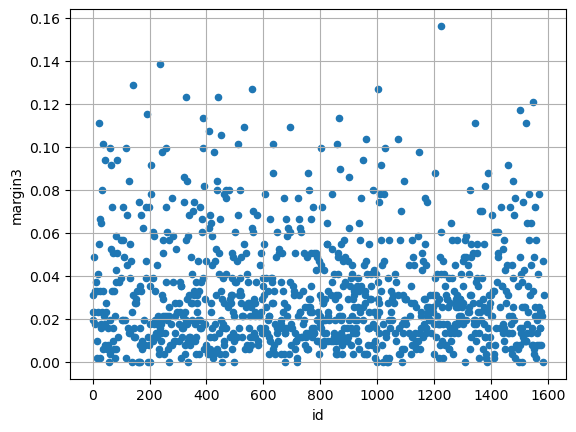

In [19]:
df.plot(kind="scatter",x="id",y="margin3");
plt.grid()
plt.show()

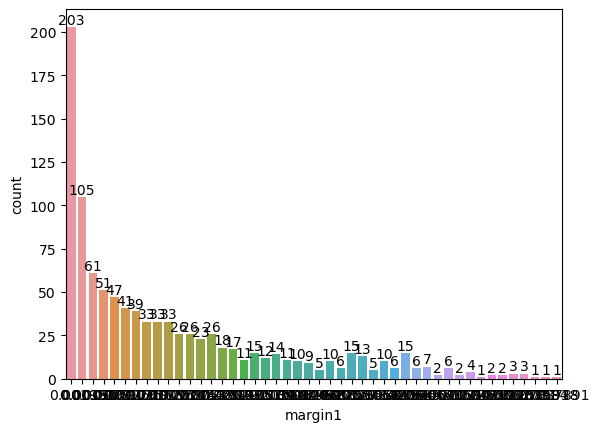

In [21]:
ax = sns.countplot(x="margin1",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

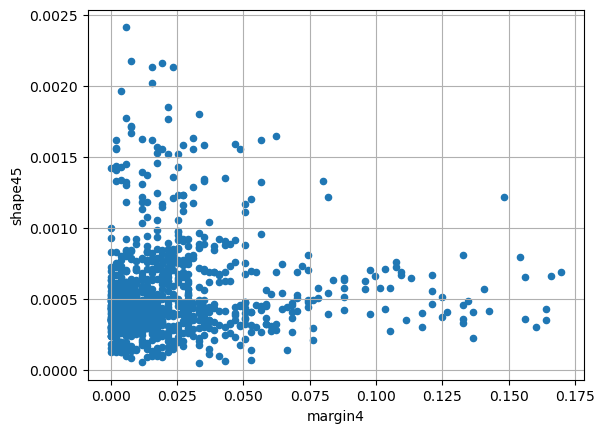

In [23]:
df.plot(kind="scatter",x="margin4",y="shape45");
plt.grid()
plt.show()

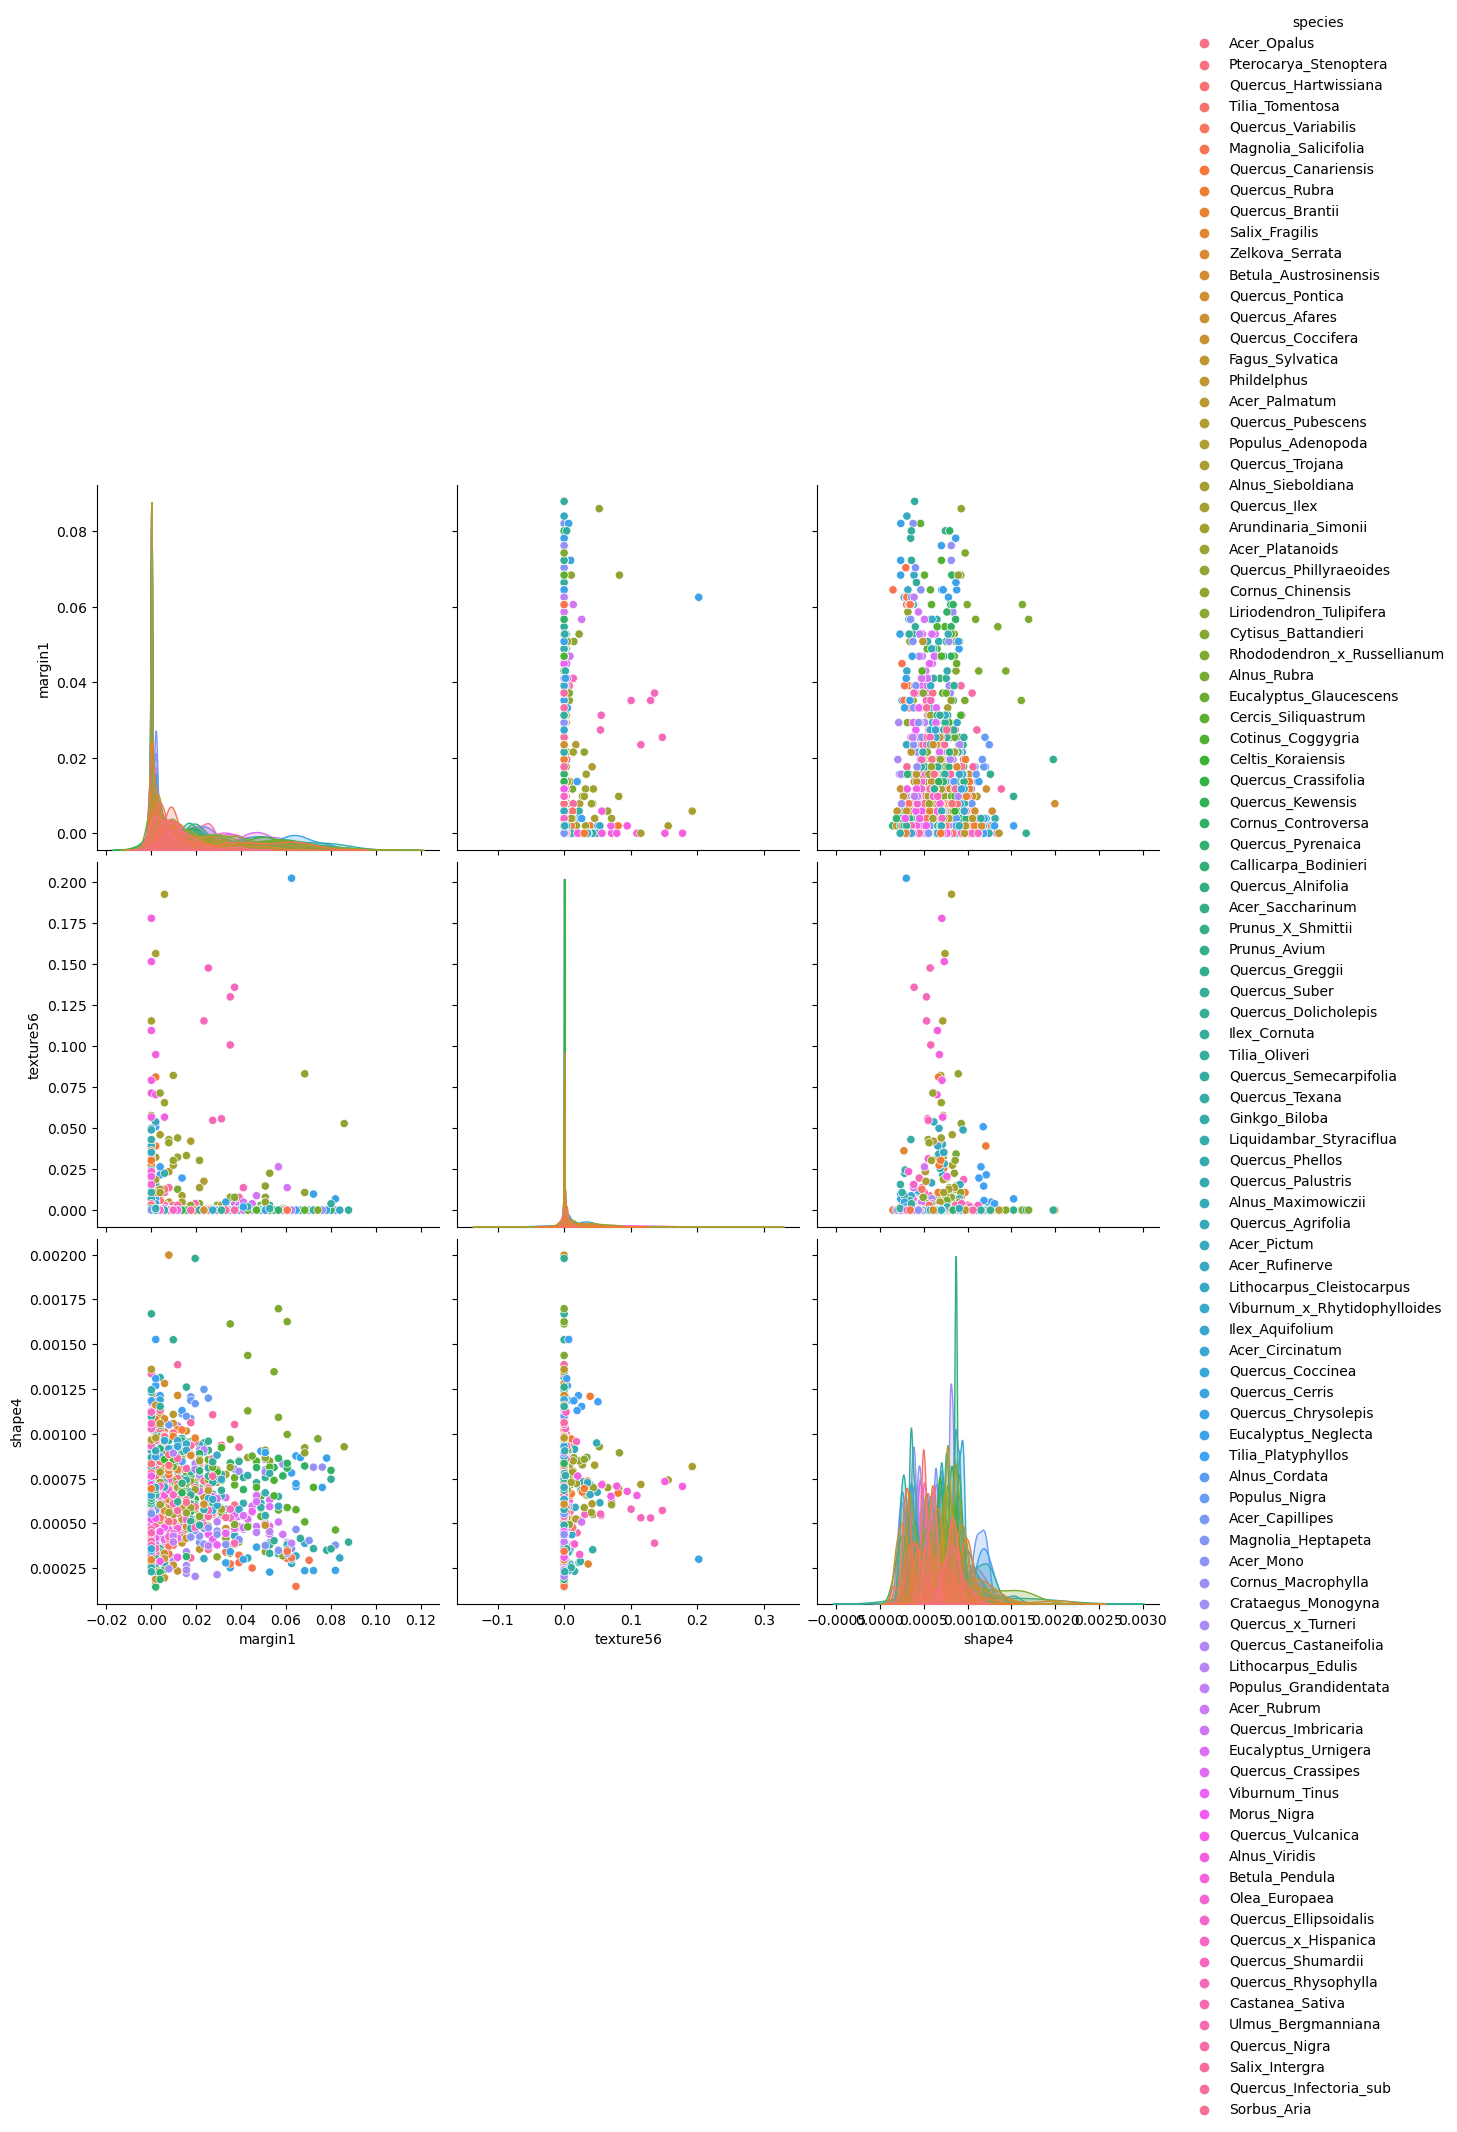

In [27]:
sns.pairplot(df,hue="species",vars=["margin1","texture56","shape4"],size=4)
plt.show()

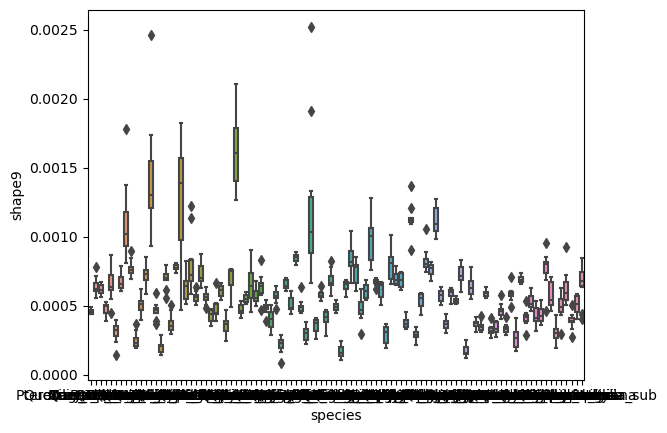

In [29]:
sns.boxplot(x= "species", y="shape9",data=df)
plt.show()


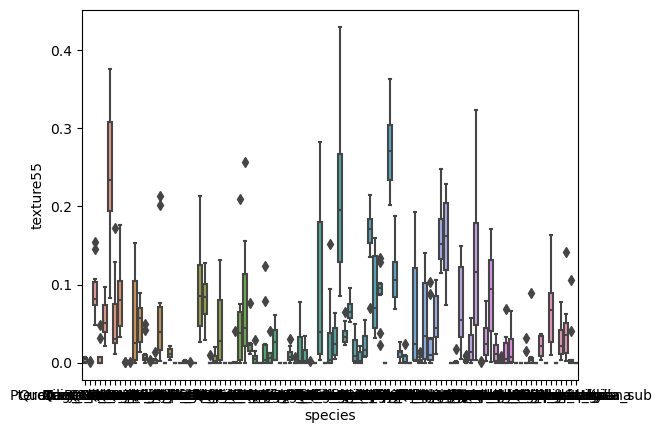

In [31]:
sns.boxplot(x="species", y="texture55",data =df)
plt.show()

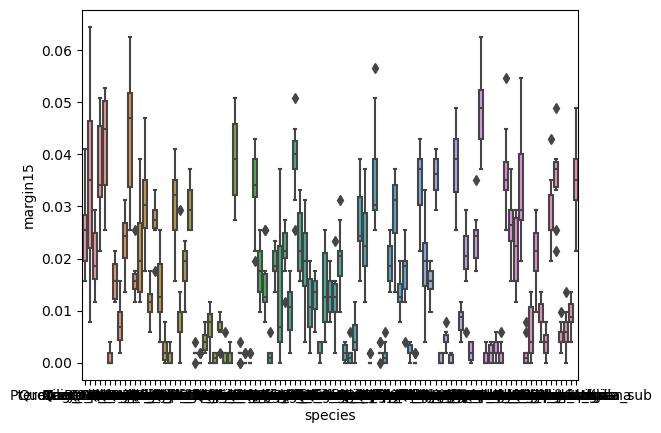

In [33]:
sns.boxplot(x= "species", y="margin15",data=df)
plt.show()

# Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
df['species'] = label_encoder.fit_transform(df["species"])

In [40]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int32(1), int64(1)
memory usage: 1.5 MB


In [44]:
df['species'].unique()

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 13, 66, 15,  6, 73, 22, 36, 27, 88, 12, 28, 21, 25,
       20, 60, 69, 23, 76, 18, 52,  9, 48, 47, 64, 81, 62, 34, 92, 79, 82,
       32, 35, 72, 71, 11, 51,  5,  8, 37, 97, 33,  1, 59, 56, 57, 29, 93,
       10, 46,  0, 39,  2, 24, 26, 87, 55, 38, 45,  7, 67, 30, 61, 96, 41,
       85, 14, 17, 42, 63, 86, 80, 77, 19, 95, 70, 90, 68, 91])

In [46]:
df['species'].value_counts()

species
3     10
26    10
2     10
39    10
0     10
      ..
12    10
88    10
27    10
36    10
91    10
Name: count, Length: 99, dtype: int64

# PCA

In [49]:
X = df.drop('species',axis="columns")
y = df['species']

In [51]:
X

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [53]:
y

0       3
1      49
2      65
3      94
4      84
       ..
985    40
986     5
987    11
988    78
989    50
Name: species, Length: 990, dtype: int32

# Logistic_Regression for checking 

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test) 

0.12121212121212122

# PCA Continues

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca =pca.fit_transform(X)


In [63]:
X_pca.shape

(990, 6)

In [65]:
X_pca

array([[ 7.98595958e+02, -4.92201309e-02, -4.39052646e-02,
        -8.61268092e-02,  1.26193925e-02,  1.62854259e-02],
       [ 7.97595957e+02, -1.13297018e-01, -7.65345840e-02,
        -2.45490851e-02, -2.11509368e-02, -7.84625775e-03],
       [ 7.96595962e+02,  7.14195340e-02, -8.38540097e-02,
         6.51456545e-02, -2.02749295e-02,  4.02952051e-02],
       ...,
       [-7.81404042e+02, -1.03241551e-01, -5.54096016e-02,
         5.76881450e-02, -1.62240601e-02, -2.95833730e-02],
       [-7.82404039e+02,  6.53576501e-02, -5.05575808e-02,
         7.64185552e-02,  1.66141598e-02, -1.03755961e-02],
       [-7.84404042e+02, -3.85663789e-02, -3.65392681e-02,
        -6.64639300e-02,  2.23985051e-02, -1.02283238e-02]])

In [67]:
pca.explained_variance_ratio_

array([9.99999590e-01, 6.11433311e-08, 4.18357294e-08, 3.55193610e-08,
       2.78367629e-08, 2.27785916e-08])

# RandomForest Algorithm

In [70]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train_pca,y_train)

RandomForestClassifier(n_estimators=80)

In [73]:
model.score(X_test_pca,y_test)*100

95.95959595959596

In [74]:
y_predict = model.predict(X_test_pca)
y_predict

array([71, 75, 44, 45, 21,  8, 50,  0, 47, 58, 33, 16, 51, 76, 90, 42, 63,
       26, 68, 50, 95, 29, 76, 46, 68, 42, 66, 53,  1, 51, 44, 38, 94, 28,
       18, 32, 42, 79, 54, 22, 55, 89, 78, 54, 64, 83, 89, 46, 43, 77,  3,
       84,  2, 27, 27, 84, 88, 57, 96, 86, 39, 89, 98, 66, 46, 51, 44, 87,
       63, 85, 30, 10, 87, 77, 83, 53, 23, 35,  7, 24, 86, 92, 34, 17, 13,
       96, 61, 70, 79, 20, 23, 23, 58,  6, 16, 58, 40, 53, 34, 93,  5, 42,
       53, 26, 46, 23, 45, 74, 73, 66, 62, 51, 92, 20, 42, 54, 71, 36,  3,
        9,  5, 55, 10, 95, 58, 17, 93, 85, 33, 63, 66, 35, 11, 88, 37, 48,
       59, 14, 58,  6,  4, 97, 67, 85, 97, 75, 17,  8, 89, 93, 79, 32, 48,
       93, 69, 54, 93, 54, 65, 83, 98, 73, 74, 19, 10, 15, 63, 82, 34, 25,
       91, 52,  3, 67, 28, 61, 15,  0, 48, 34, 24, 51, 74,  3, 77, 77, 65,
       44, 92, 34, 88, 91,  7, 97, 38, 25, 44,  7])

In [77]:
accuracy_score(y_test,y_predict)

0.9595959595959596

# SupportVectorMachine Algorithms

In [81]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [83]:
from sklearn.svm import SVC
model = SVC() 
model.fit(X_train_pca,y_train)

SVC()

In [85]:
model.score(X_test_pca,y_test)

0.0

In [87]:
y_predict = model.predict(X_test_pca)
y_predict

array([37, 60, 37, 72, 72, 37, 72, 60, 41, 60, 60, 37, 60, 41, 37, 37, 37,
       37, 72, 41, 72, 37, 60, 37, 49, 72, 49, 37, 41, 37, 41, 37, 31, 37,
       37, 60, 37, 37, 49, 41, 49, 72, 37, 72, 72, 41, 41, 37, 49, 72, 31,
       31, 49, 37, 72, 60, 72, 72, 60, 60, 72, 49, 31, 37, 37, 37, 49, 72,
       37, 72, 60, 37, 72, 72, 60, 37, 72, 37, 60, 37, 41, 37, 41, 49, 37,
       37, 37, 72, 41, 49, 72, 49, 72, 37, 37, 72, 37, 37, 60, 37, 72, 49,
       37, 72, 37, 41, 37, 31, 41, 37, 49, 37, 41, 31, 41, 60, 60, 31, 49,
       60, 41, 41, 60, 72, 49, 37, 49, 49, 41, 37, 37, 60, 72, 37, 37, 31,
       41, 37, 41, 37, 60, 37, 41, 41, 72, 41, 72, 72, 37, 37, 72, 37, 49,
       72, 41, 41, 60, 31, 31, 41, 37, 41, 37, 72, 72, 37, 72, 41, 72, 37,
       41, 41, 37, 41, 60, 37, 60, 72, 72, 72, 41, 72, 37, 72, 37, 72, 60,
       37, 37, 49, 37, 72, 49, 72, 49, 37, 41, 72])

In [89]:
accuracy_score(y_test,y_predict)

0.0

# Decision tree algorithms

In [92]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [94]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train_pca,y_train)

DecisionTreeClassifier()

In [95]:
model.score(X_test_pca,y_test)*100

64.14141414141415

In [98]:
y_predict = model.predict(X_test_pca)
y_predict

array([63, 75, 44, 84, 21,  8, 50, 54, 47, 58, 55,  1, 51, 76, 90, 42, 63,
       83, 90, 50, 94, 28, 76, 83, 68, 42, 66, 12,  1, 78, 44, 38, 94, 29,
       18, 32,  2, 60, 35, 22, 12, 89, 78, 65, 64, 84, 89, 46, 43, 77,  3,
       10,  2, 31, 97, 84, 88, 57, 42, 90, 39, 89, 98, 31, 46, 46, 31, 87,
       71, 45, 30, 10, 87, 77, 83, 53, 23, 35, 86, 24, 86, 92, 34, 17, 13,
       23, 61, 70, 79,  8, 23, 23, 58,  6, 16, 58, 40, 17, 40, 20,  5, 42,
       64, 26, 46, 23, 45, 10, 86, 66, 20, 51, 92, 20, 42, 48, 59, 36,  3,
       75, 59, 55, 44, 95, 58, 17,  8, 95, 33, 63, 66, 35, 11, 88, 37, 48,
       59, 14, 58,  6,  4, 68, 67, 79, 97, 56, 98,  8, 89, 70, 60, 44, 13,
       20, 69, 65, 93, 64, 54, 10, 98, 73, 26, 19, 20, 15, 63, 82, 34, 25,
       91, 52, 76, 67, 25, 61, 15,  0, 48, 34, 24, 51, 74, 69, 77, 66, 12,
        2, 92, 34, 88, 91,  7, 88, 38, 25, 44,  7])

In [100]:
accuracy_score(y_test,y_predict)

0.6414141414141414

# NaiveBayes Algorithm

In [103]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [105]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_pca,y_train)

GaussianNB()

In [106]:
model.score(X_test_pca,y_test)*100

90.40404040404042

# so we get best accuracy from the model Random forest we will use that for further process 

In [111]:
df1 = pd.read_csv("G://DataScience project practice//industrial project Datasciencce//test.csv")

In [113]:
df1

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


# another try 

In [118]:
margin=df.iloc[:,2:66]
margin

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.105470,0.000000,0.015625,0.015625,0.019531,0.001953,0.000000,0.005859,0.011719,0.007812
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.037109,0.017578,0.003906,0.000000,0.001953,0.003906,0.003906,0.000000,0.003906,0.005859
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.003906,0.017578,0.015625,0.001953,0.041016,0.005859,0.000000,0.000000,0.017578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.000000,0.000000,0.019531,0.019531,0.017578,0.001953,0.000000,0.000000,0.039062,0.000000
986,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.000000,0.000000,0.005859,0.097656,0.099609,0.029297,0.000000,0.003906,0.007812,0.011719
987,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.001953,0.001953,0.000000,0.001953,0.007812,0.056641,0.001953,0.005859,0.005859,0.003906
988,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,0.001953,...,0.000000,0.001953,0.011719,0.015625,0.068359,0.037109,0.000000,0.009766,0.027344,0.009766


In [120]:
shape = df.iloc[:,67:130]
shape

,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,...,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64
0,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,...,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660
1,0.000695,0.000720,0.000709,0.000688,0.000660,0.000624,0.000585,0.000556,0.000531,0.000506,...,0.000518,0.000546,0.000574,0.000608,0.000641,0.000674,0.000703,0.000707,0.000688,0.000747
2,0.000910,0.000870,0.000826,0.000796,0.000763,0.000729,0.000702,0.000664,0.000629,0.000598,...,0.000610,0.000639,0.000670,0.000697,0.000739,0.000789,0.000836,0.000882,0.000911,0.000971
3,0.000465,0.000473,0.000483,0.000492,0.000493,0.000492,0.000492,0.000496,0.000497,0.000475,...,0.000529,0.000480,0.000449,0.000437,0.000437,0.000430,0.000429,0.000431,0.000438,0.000443
4,0.000598,0.000509,0.000385,0.000299,0.000330,0.000427,0.000536,0.000641,0.000645,0.000597,...,0.000973,0.000863,0.000890,0.000911,0.000814,0.000683,0.000593,0.000622,0.000735,0.000755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.000398,0.000354,0.000344,0.000292,0.000255,0.000335,0.000420,0.000399,0.000347,0.000352,...,0.000322,0.000223,0.000166,0.000092,0.000116,0.000200,0.000254,0.000330,0.000424,0.000535
986,0.000670,0.000694,0.000701,0.000651,0.000630,0.000639,0.000689,0.000666,0.000650,0.000683,...,0.000708,0.000705,0.000678,0.000655,0.000666,0.000614,0.000641,0.000669,0.000704,0.000751
987,0.001005,0.000959,0.000905,0.000851,0.000802,0.000748,0.000697,0.000648,0.000601,0.000558,...,0.000571,0.000613,0.000660,0.000714,0.000770,0.000824,0.000872,0.000901,0.000936,0.001010
988,0.000616,0.000650,0.000694,0.000750,0.000810,0.000874,0.000946,0.001017,0.001093,0.001163,...,0.000919,0.000848,0.000784,0.000734,0.000692,0.000650,0.000612,0.000586,0.000587,0.000582


In [122]:
texture = df.iloc[:,130:194]
texture

,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,0.000000,0.000000,0.007812,0.079102,0.000000,0.039062,0.000977,0.000000,0.027344,0.003906,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,0.003906,0.047852,0.008789,0.000000,0.097656,0.005859,0.003906,0.101560,0.032227,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,0.023438,0.000977,0.007812,0.020508,0.000000,0.000000,0.013672,0.004883,0.006836,0.095703,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,0.039062,0.036133,0.003906,0.003906,0.046875,0.000000,0.041016,0.041016,0.000000,0.010742,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.020508,0.004883,0.012695,0.000000,0.040039,0.000000,0.006836,0.019531,0.022461,0.000000,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,0.000977,0.006836,0.005859,0.005859,0.082031,0.000000,0.004883,0.044922,0.004883,0.002930,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,0.001953,0.007812,0.003906,0.048828,0.015625,0.000977,0.015625,0.028320,0.005859,0.014648,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,0.000000,0.001953,0.033203,0.002930,0.051758,0.000000,0.000000,0.024414,0.000000,0.000000,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [124]:
species = dt.iloc[:,1]
species

0       3
1      49
2      65
3      94
4      84
       ..
985    40
986     5
987    11
988    78
989    50
Name: species, Length: 990, dtype: int32

# prediction

In [127]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X ,y , test_size=0.2, random_state=30)

In [129]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train_pca,y_train)

RandomForestClassifier(n_estimators=80)

In [130]:
model.score(X_test_pca,y_test)*100

96.46464646464646

In [133]:
model.predict(df1)

array([51, 50,  1, 19, 14,  3,  3, 28, 84,  8, 43, 74, 75, 10, 52, 46, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18, 17,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29,  7, 31, 98, 92, 84, 25, 10, 61, 43, 85, 24,  1,
        2, 23, 83, 40, 22, 48, 90, 25, 21, 37, 56, 41, 95,  7, 89, 98, 77,
        3, 12, 31, 84, 53, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 34, 60, 17, 64, 27, 51, 31, 39, 23, 24,  2, 41, 61, 24, 97,
       29, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 26, 38, 43, 56, 20, 60, 46, 79, 22, 79, 55, 87, 65, 97,
       75, 21, 29, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 49, 89, 72, 36, 11, 81, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 90, 66, 89, 92, 13,  2, 59,  0, 96, 70, 32, 29, 78, 91,
       55, 10, 38,  5, 60